In [1]:
#Importamos las librerias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
#Importemos el archivo
df = pd.read_csv('C:/Users/Layla/Desktop/Docencia/Coder House/Materiales complementarios/Mod 4 - Data Science/4. Análisis Bivariado/Desafio - Sesion/supermarket_sales.csv')

In [3]:
#Head del df
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
#Veamos el shape
df.shape

(1000, 17)

In [5]:
#Totalidad de registros por columnas
df.count()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

In [6]:
#Tipo de dato de cada columna
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [7]:
#Principales medidas estadisticas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.220360e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [8]:
#Data Profiling
profile = pandas_profiling.ProfileReport(df)

Ahora bien, a través del uso del Análisis Bivariado, trataremos de responder una serie de preguntas de negocio.

1. ¿Los ingresos brutos afectan las calificaciones que brindan los clientes?

Podemos usar el diagrama de dispersión para responder a esta pregunta.

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

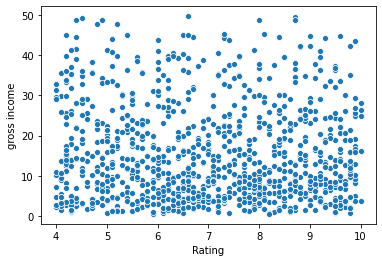

In [9]:
sns.scatterplot(df['Rating'], df['gross income'])

**Respuesta**: Como puede ver en el gráfico de dispersión no existe una relación entre el ingreso bruto de un cliente y su calificación.

2. ¿Qué rama es la más rentable?

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

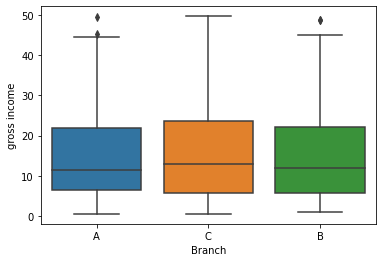

In [10]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

**Respuesta**: No hay mucha diferencia en el ingreso bruto por sucursales a un nivel promedio. La sucursal C tiene ingresos ligeramente más altos que A o B. Como se observó anteriormente, aunque la sucursal A tiene ventas ligeramente más altas que el resto, C, es decir, Naypyitaw es la sucursal más rentable en términos de ingresos brutos.

3. ¿Existe alguna relación entre género e ingreso bruto?

De manera similar al análisis anterior, podemos usar un diagrama de caja para responder a esta pregunta.

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

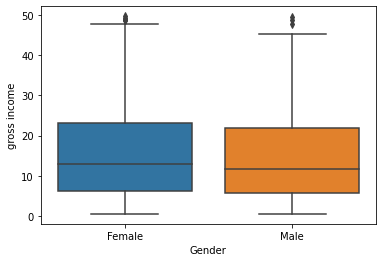

In [11]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

**Respuesta** : El ingreso bruto es similar tanto para hombres como para mujeres, aunque las clientas gastan un poco más en el percentil 75.

4. ¿Qué línea de productos genera más ingresos?

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

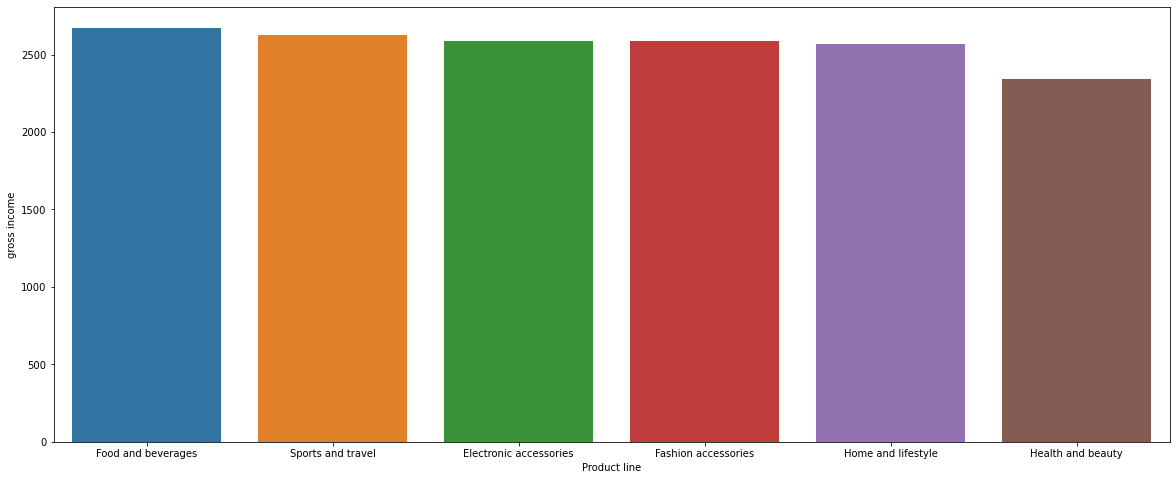

In [12]:
cat = df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)

plt.figure(figsize=(20,8))

sns.barplot(x='Product line', y='gross income', data=cat)

**Respuesta** : El ingreso bruto es más alto en deportes y viajes.